In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
df.shape

(500, 9)

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df=df.drop('Serial No.',axis=1)

In [6]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
from sklearn.preprocessing import Binarizer
bi=Binarizer(threshold=0.75)
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])

#df['Chance of Admit '] = [1 if each > 0.75 else 0 for each in df['Chance of Admit ']]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,1.0
2,316,104,3,3.0,3.5,8.00,1,0.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,0.0


In [9]:
X=df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research']]
y=df['Chance of Admit ']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=40,test_size=0.25)

In [11]:
print(f"X_train shape :{X_train.shape}")
print(f"X_test shape :{X_test.shape}")
print(f"y_train shape :{y_train.shape}")
print(f"y_test shape :{y_test.shape}")

X_train shape :(375, 7)
X_test shape :(125, 7)
y_train shape :(375,)
y_test shape :(125,)


In [13]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=40)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=40)

In [15]:
predicted=model.predict(X_test)
predicted

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [17]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(f"Accuracy : {accuracy_score(y_test,predicted)}")
print(f"Precisiom : {precision_score(y_test,predicted)}")
print(f"Recall : {recall_score(y_test,predicted)}")
print(f"F1-score : {f1_score(y_test,predicted)}")

Accuracy : 0.808
Precisiom : 0.7543859649122807
Recall : 0.8113207547169812
F1-score : 0.7818181818181819


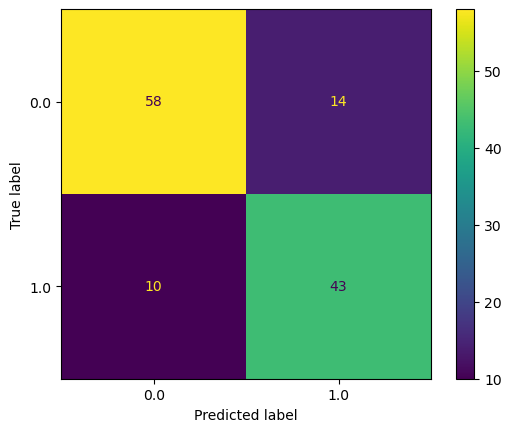

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,predicted)

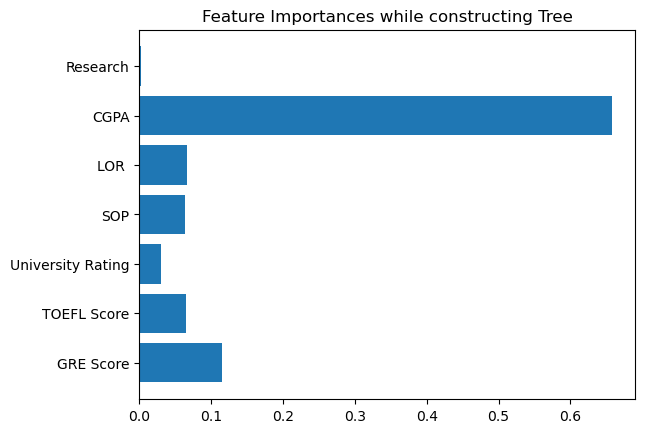

In [21]:
plt.barh(X.columns,model.feature_importances_)
plt.title("Feature Importances while constructing Tree")
plt.show()

In [28]:
tree=DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

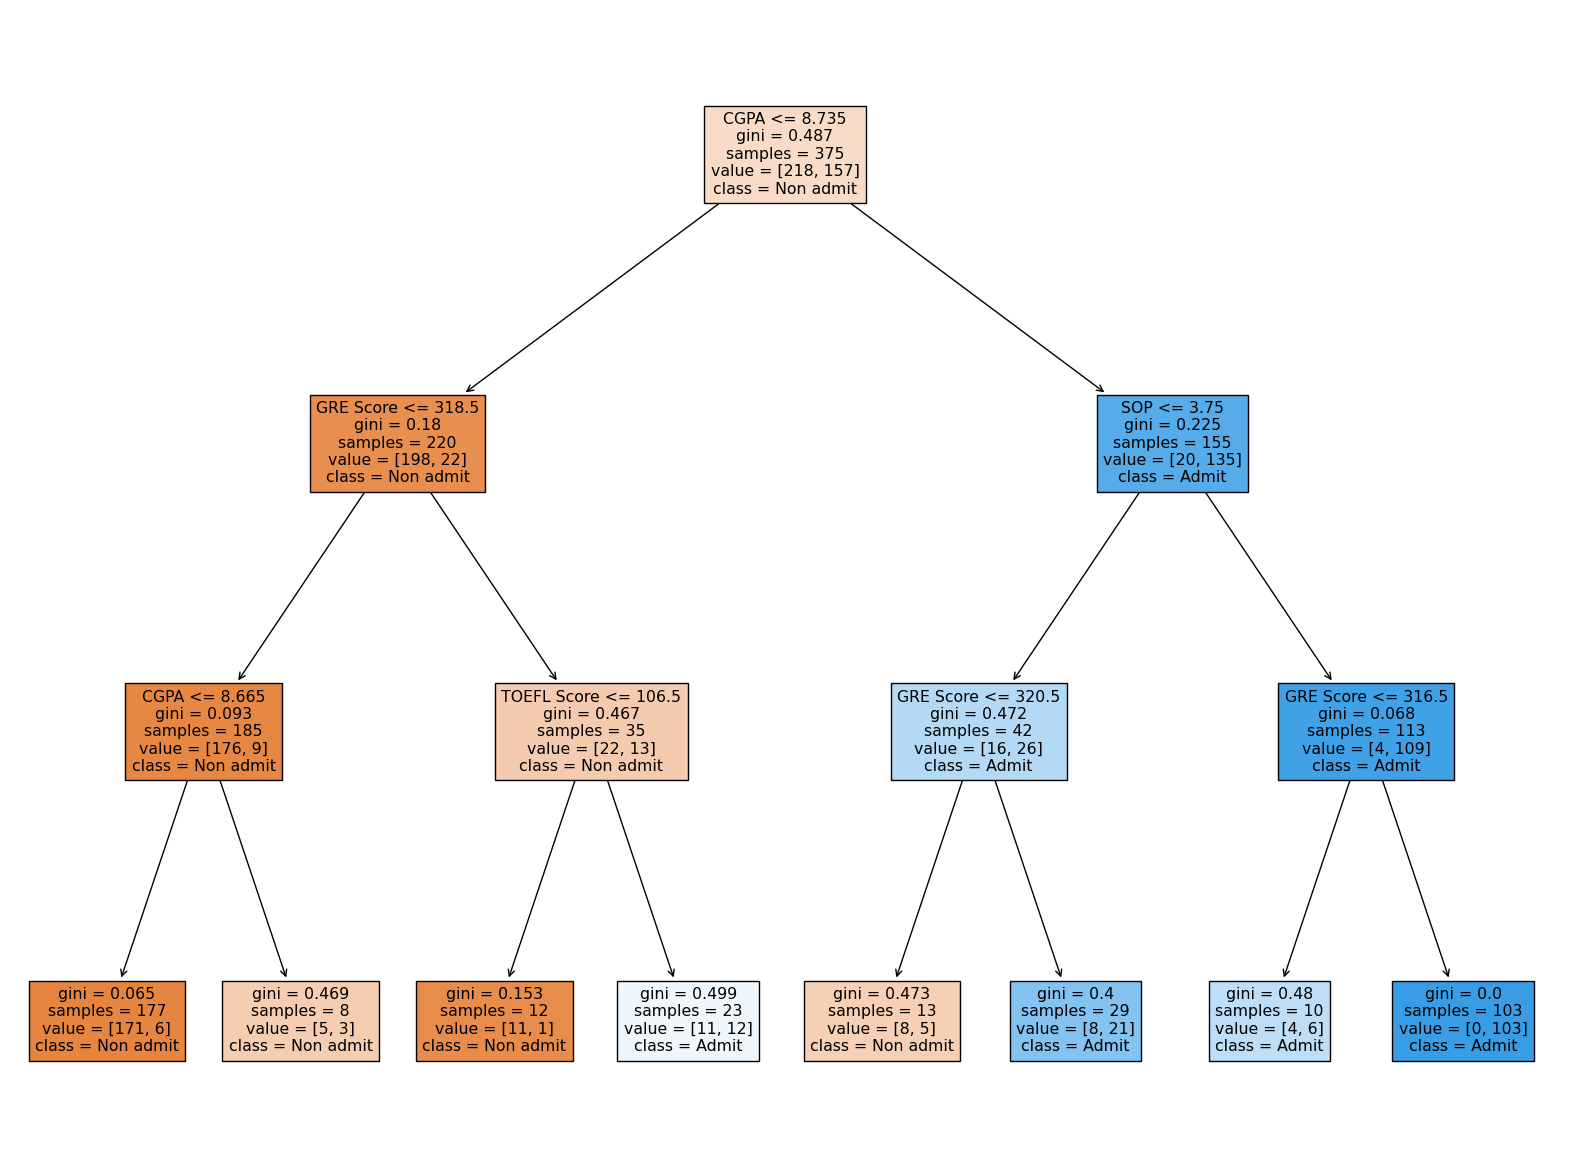

In [29]:
import sklearn.tree as tr
fig = plt.figure(figsize=(20,15))
_ = tr.plot_tree(tree, 
                 feature_names=X.columns,  
                 class_names=np.array(["Non admit","Admit"]),
                 filled=True)